# **Analysis of Heart Disease Mortality Data**

#### **Samarth Tuli, Ndenko Fontem, Yi Zhu, Kimia Samieinejad**    


### **Importance of Heart Disease Mortality Research**    
People across the world have experiencing several physical diseases ranging from diabetes to arthritis and mental health disorders from depression to suicide within the past 2 decades, which has made global health a significant priority of the research community. However, one of the most important disease types that is being studied is heart disease, especially coronary (ischemic) artery disease. According to the [World Health Organization](https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1), heart disease is the leading global cause of death, which results in 17.9 million annual deaths. 4 out of every 5 heart disease deaths are caused by heart attacks and strokes, which can be caused by any mental or physical health factors, and one third of heart disease deaths occur prematurely to people under the age of 70, which means everyone is vulnerable to heart disease. Research efforts led by NIH and WHO have shown that a wide variety of behavioral, medical, and socioeconomic risk factors can be underlying causes for heart disease mortality including tobacco and alcohol consumption, obesity, lack of physical activity, malnutrition, increased blood pressure, and restricted access to primary healthcare facilities. Other commorbidities (pre-existing conditions) such as diabetes, arthritis, chronic kidney disease, and anxiety problems. Given the massive amount of data collected on these factors and how heart disease deaths can vary for each country's population, data scientists have a significant role to break down this data into insights that can guide the future path of heart disease mortality research. In our dataset, we are defining heart disease mortality rate as the number of heart disease related deaths per 100,000 people and will cover it for all countries from 2012-2017 and will focus upon countries within North America and Europe.

### **What is coronary heart disease?**

According to the NIH's latest research, [coronary heart disease](https://www.nhlbi.nih.gov/health/coronary-heart-disease) is a cardiovascular disease where the arteries cannot provide sufficient oxygen to a person's bloodstream. The primary cause of CHD is high cholesterol forming plaque along the lining of the arteries, which can constrict blood flow, cause blood vessels to stop functioning normally, and also increase the chances of severe chest pain or heart attacks or strokes or cardiac arrest. Although the risk of coronary heart disease can be reduced through lifestyle changes, many people don't take immediate action. This has resulted in it becoming globally widespread with 650000 deaths per year due to generalized heart disease, 11% of adults being diagnosed with heart disease, and 366000 annual deaths due to CHD specifically in the US alone. This background clearly demonstrates that heart disease mortality data needs to be analyzed by data scientists to provide key insights that will mitigate risk for future heart patients.

### **Tutorial Purpose**

The objective of this tutorial is to evaluate many factors that may positively or negatively affect the heart disease mortality rates of populations across different countries so that we can get a better understanding of what factors should be focused upon most by the research community to reduce the overall risk of heart disease-related deaths in North America and European countries. Data science is the right tool to achieve this because it will allow us to deconstruct complex heart disease mortality data into specific insights and recommendations that can be used by heart disease research leaders and policymakers to take immediate action through a 5-stage pipeline: data collection and processing, exploratory data analysis and visualizations, analysis/hypothesis testing/use of ML models, and insights & policy decisions.

## **Data Collection and Processing**

We collected data from the Global Health Observatory database on the [World Health Organization](https://www.who.int/data/gho). This specialized agency established by the United Nations is responsible for harmonizing the global health activties and aiding governments around the world in inhancing their healthcare systems. The specific input features we got data for from WHO for each country and year were age-standardized suicide rate (per 100000 people), mean BMI, raised blood pressure, mean HDL cholesterol, meany systolic blood pressure, health expenditure as % of GDP, and % of overweight adults. We also collected data from [Our World in Data](https://ourworldindata.org/). We got data on heart disease mortality rate (deaths per 100,000 people), which is our target feature we're trying to predict. We also retrieved two more input features, which are deaths caused by type 1 and 2 diabetes in each country.  Our World is a online scientific publication that focuses on global challenges such as poverty, disease, and inequality. We collected data for all 183 countries in 2012-2017 for all 9 features (including heart disease mortality rate) from WHO and Our World in Data. However, two issues we encountered for our datasets are that some of them do not contain data for all 183 countries or our designated year range (2012-2017) in each feature. To combat this problem, we performed imputation via linear regression to predict and fill in the missing values for each input feature.

In [2]:
# packages for data collection and processing
import numpy as np
import pandas as pd

# packages for plotting graphs (feature visualization)
import matplotlib.pyplot as plt

# packages for ML and filling in missing values
from sklearn import linear_model


### **Add heart disease mortality (death rate) data**
The first step we will take is to import the [heart disease death rate](https://ourworldindata.org/grapher/cardiovascular-disease-death-rates) (target feature) data and remove the columns we won't use. This feature is an age-standardized estimate for both sexes and has data from 1990-2019 but we will only be using the rows from 2012-2017 in this table.

In [4]:
# Import and process age-standardized heart disease death rates data for both sexes (# of heart disease deaths per 100000 people)
heart_disease_death_rates = pd.read_csv('data/cardiovascular-disease-death-rates.csv')
heart_disease_death_rates = heart_disease_death_rates[['Entity', 'Year', 'Deaths - Cardiovascular diseases - Sex: Both - Age: Age-standardized (Rate)']]
heart_disease_death_rates = heart_disease_death_rates.rename(columns = {"Entity":"Country", 'Deaths - Cardiovascular diseases - Sex: Both - Age: Age-standardized (Rate)':'Heart Disease Mortality Rate (Deaths per 100K people)'})
heart_disease_death_rates = heart_disease_death_rates[(heart_disease_death_rates['Year']>=2012) & (heart_disease_death_rates['Year']<=2017)]
heart_disease_death_rates = heart_disease_death_rates.reset_index(drop = True)
percentage_missing_values_heart_disease_mortality = ((float(heart_disease_death_rates['Heart Disease Mortality Rate (Deaths per 100K people)'].isna().sum()))/heart_disease_death_rates['Heart Disease Mortality Rate (Deaths per 100K people)'].count()) * 100.0
print("Percentage Missing Values: ", percentage_missing_values_heart_disease_mortality)
heart_disease_death_rates

Percentage Missing Values:  0.0


,Country,Year,Heart Disease Mortality Rate (Deaths per 100K people)
0,Afghanistan,2012,618.45
1,Afghanistan,2013,607.69
2,Afghanistan,2014,600.55
3,Afghanistan,2015,597.02
4,Afghanistan,2016,591.59
...,...,...,...
1363,Zimbabwe,2013,331.36
1364,Zimbabwe,2014,330.58
1365,Zimbabwe,2015,329.57
1366,Zimbabwe,2016,327.64


### **Add anxiety disorder prevalence data**
The second step we will take is to import the [anxiety disorder prevalence data](https://ourworldindata.org/grapher/anxiety-disorders-prevalence?tab=chart) and remove the columns we aren't going to use. This feature is an age-standardized estimate and is a % of each country's population that comes from Our World in Data. The anxiety prevalence table includes data from 2012-2017 for both sexes. There are no missing values in the anxiety data before joining, so no imputation is required. However, after merging the anxiety data with the heart disease mortality data frame, we can see that 6.5% of the anxiety data has missing values in the main data frame. Therefore, we have to fill each missing value with the average anxiety prevalence for that particular year. After doing so, there are no more missing values. Hoewver, we must remember to account for potential bias.

In [5]:
# Import and process % of population with anxiety disorders data for both sexes
# Extract 3 fields (country, year, and anxiety disorder prevalence
anxiety_prevalence_all_countries = pd.read_csv('data/anxiety-disorders-prevalence.csv')
anxiety_prevalence_all_countries = anxiety_prevalence_all_countries[['Entity', 'Year', 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized']]
anxiety_prevalence_all_countries = anxiety_prevalence_all_countries[(anxiety_prevalence_all_countries['Year']>=2012) & (anxiety_prevalence_all_countries['Year']<=2017)]
anxiety_prevalence_all_countries = anxiety_prevalence_all_countries.rename(columns = {'Entity':'Country', 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized':"% of population with anxiety disorders"})
anxiety_prevalence_all_countries = anxiety_prevalence_all_countries.sort_values(by = ['Country', 'Year'])
anxiety_prevalence_all_countries = anxiety_prevalence_all_countries.reset_index(drop = True)
# Compute % of missing values in anxiety disorder data
percentage_missing_values_anxiety_before = ((float(anxiety_prevalence_all_countries['% of population with anxiety disorders'].isna().sum()))/anxiety_prevalence_all_countries['% of population with anxiety disorders'].count()) * 100.0
print("Percent Missing Anxiety Values Before Join: ", percentage_missing_values_anxiety_before)
# Substituting all NaN values in anxiety col of main dataframe with mean values of corresponding years
heart_disease_death_rates['% of population with anxiety disorders'] = anxiety_prevalence_all_countries['% of population with anxiety disorders']
heart_disease_death_rates['% of population with anxiety disorders'] = heart_disease_death_rates['% of population with anxiety disorders'].fillna(0.0)
for index, row in heart_disease_death_rates.iterrows():
    if row['% of population with anxiety disorders'] == 0.0:
        anxiety_col = heart_disease_death_rates[heart_disease_death_rates['Year'] == row['Year']]['% of population with anxiety disorders']
        mean_anxiety = anxiety_col.mean(axis = 0)
        heart_disease_death_rates.loc[index, '% of population with anxiety disorders'] = mean_anxiety
# Compute % of missing values in anxiety after join
percentage_missing_values_anxiety_after = ((float(heart_disease_death_rates['% of population with anxiety disorders'].isna().sum()))/heart_disease_death_rates['% of population with anxiety disorders'].count()) * 100.0
print("Percent Missing Anxiety Values After Join and Imputation: ", percentage_missing_values_anxiety_after)
# Outputting heart disease death rates df with anxiety column
heart_disease_death_rates

Percent Missing Anxiety Values Before Join:  0.0
Percent Missing Anxiety Values After Join and Imputation:  0.0


,Country,Year,Heart Disease Mortality Rate (Deaths per 100K people),% of population with anxiety disorders
0,Afghanistan,2012,618.45,4.739260
1,Afghanistan,2013,607.69,4.766758
2,Afghanistan,2014,600.55,4.793179
3,Afghanistan,2015,597.02,4.810425
4,Afghanistan,2016,591.59,4.815518
...,...,...,...,...
1363,Zimbabwe,2013,331.36,4.113508
1364,Zimbabwe,2014,330.58,4.119858
1365,Zimbabwe,2015,329.57,4.124367
1366,Zimbabwe,2016,327.64,4.126087


### **Add BMI data**

The third step we will take is to import the [mean BMI data](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/mean-bmi-(kg-m-)-(age-standardized-estimate)) and remove the columns we aren't going to use. This feature data comes from the World Health Organization. The mean BMI table includes data from 2012-2017 that separates BMI  by sex. We will only consider the mean BMI for both sexes combined (is an average of both sexes separately). There are 2.09% missing values in the BMI data before joining. After merging the BMI data with the heart disease mortality data frame, we can see that 43.25% of the BMI data has missing values in the main data frame. Therefore, we have to perform imputation by filling each missing value with the average mean BMI for that particular year. After doing so, there are no more missing values. However, this might introduce some bias.

In [6]:
# Import and process mean BMI data for both sexes
bmi_all_countries = pd.read_csv('data/BMI.csv')
bmi_all_countries = bmi_all_countries[['Location', 'Period', 'Dim1','FactValueNumeric']]
bmi_all_countries = bmi_all_countries.rename(columns = {"Location": "Country", "Period": "Year", "Dim1":"Sex", "Dim2":"Age", "FactValueNumeric": "Mean BMI"})
bmi_all_countries = bmi_all_countries[bmi_all_countries["Sex"] == "Both sexes"]
# Sort data frame by country and year and reset index
bmi_all_countries = bmi_all_countries.sort_values(by=['Country', 'Year'])
bmi_all_countries = bmi_all_countries.reset_index(drop = True)
bmi_all_countries = bmi_all_countries[['Country', 'Year', 'Mean BMI']]
# Compute % of missing values in BMI data frame before join
percentage_missing_values_bmi_before = ((float(bmi_all_countries['Mean BMI'].isna().sum()))/bmi_all_countries['Mean BMI'].count()) * 100.0
print("Percentage of Missing Values for Mean BMI Before Join: ", percentage_missing_values_bmi_before)
# Merge BMI data with heart disease mortality data frame, Substituting all NaN values in BMI col of main dataframe with mean values of corresponding years
heart_disease_death_rates['Mean BMI'] = bmi_all_countries['Mean BMI']
heart_disease_death_rates['Mean BMI'] = heart_disease_death_rates['Mean BMI'].fillna(0.0)
for index, row in heart_disease_death_rates.iterrows():
    if row['Mean BMI'] == 0.0:
        bmi_col = heart_disease_death_rates[heart_disease_death_rates['Year'] == row['Year']]['Mean BMI'].dropna()
        bmi_mean = bmi_col.mean(axis = 0)
        heart_disease_death_rates.loc[index, 'Mean BMI'] = bmi_mean
# Compute % of missing values in BMI after join
percentage_missing_values_bmi_after = ((float(heart_disease_death_rates['Mean BMI'].isna().sum()))/heart_disease_death_rates['Mean BMI'].count()) * 100.0
print("Percentage of Missing Values in Mean BMI After Join: ", percentage_missing_values_bmi_after)
# Outputting heart disease death rates df with BMI column
heart_disease_death_rates

Percentage of Missing Values for Mean BMI Before Join:  2.094240837696335
Percentage of Missing Values in Mean BMI After Join:  0.0


,Country,Year,Heart Disease Mortality Rate (Deaths per 100K people),% of population with anxiety disorders,Mean BMI
0,Afghanistan,2012,618.45,4.739260,22.900000
1,Afghanistan,2013,607.69,4.766758,23.000000
2,Afghanistan,2014,600.55,4.793179,23.200000
3,Afghanistan,2015,597.02,4.810425,23.300000
4,Afghanistan,2016,591.59,4.815518,23.400000
...,...,...,...,...,...
1363,Zimbabwe,2013,331.36,4.113508,24.191756
1364,Zimbabwe,2014,330.58,4.119858,24.120932
1365,Zimbabwe,2015,329.57,4.124367,24.157551
1366,Zimbabwe,2016,327.64,4.126087,24.128846


### **Add mean HDL cholesterol data**

The fourth step we will take is to import the [mean HDL cholesterol data](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/gho-mean-hdl-cholesterol-crude) and remove the columns we aren't going to use. This feature data comes from the World Health Organization. The mean HDL cholesterol table includes data from 2012-2017 that separates mean HDL cholesterol by sex. We will only consider the mean HDL cholesterol for both sexes combined (is an average of both sexes separately). There are no missing values in the mean HDL cholesterol data before joining, so no initial imputation is required. However, after merging the cholesterol data with the heart disease mortality data frame, we can see that 19.37% of the cholesterol data has missing values in the main data frame. Therefore, we have to fill each missing value with the average mean HDL cholesterol for that particular year. After doing so, there are no more missing values but we must keep in mind that some bias might be introduced.

In [7]:
# Import mean HDL cholesterol data of both sexes
mean_HDL_cholesterol = pd.read_csv("data/cholestrol2012-2017.csv")
mean_HDL_cholesterol = mean_HDL_cholesterol[['Location', 'Period', 'Dim1','FactValueNumeric']]
mean_HDL_cholesterol = mean_HDL_cholesterol.rename(columns = {"Location": "Country", "Period": "Year", "Dim1":"Sex", "Dim2":"Age", "FactValueNumeric": "Cholesterol Level"})
mean_HDL_cholesterol = mean_HDL_cholesterol[mean_HDL_cholesterol["Sex"] == "Both sexes"]
# Sort data frame by country and year and reset index
mean_HDL_cholesterol = mean_HDL_cholesterol.sort_values(by=['Country', 'Year'])
mean_HDL_cholesterol = mean_HDL_cholesterol.reset_index(drop = True)
mean_HDL_cholesterol  = mean_HDL_cholesterol[['Country', 'Year', 'Cholesterol Level']]
# Compute % of missing values in cholesterol data frame before join
percentage_missing_values_cholesterol_before = ((float(mean_HDL_cholesterol['Cholesterol Level'].isna().sum()))/mean_HDL_cholesterol['Cholesterol Level'].count()) * 100.0
print("Percentage of Missing Values for Mean HDL Cholesterol Before Join: ", percentage_missing_values_cholesterol_before)
# Merge cholesteorl data with heart disease mortality data frame, Substituting all NaN values in mean HDL cholesterol col of main dataframe with mean values of corresponding years
heart_disease_death_rates['Mean HDL Cholesterol'] = mean_HDL_cholesterol['Cholesterol Level']
heart_disease_death_rates['Mean HDL Cholesterol'] = heart_disease_death_rates['Mean HDL Cholesterol'].fillna(0.0)
for index, row in heart_disease_death_rates.iterrows():
    if row['Mean HDL Cholesterol'] == 0.0:
        hdl_cholesterol_col = heart_disease_death_rates[heart_disease_death_rates['Year'] == row['Year']]['Mean HDL Cholesterol'].dropna()
        hdl_cholesterol_mean = hdl_cholesterol_col.mean(axis = 0)
        heart_disease_death_rates.loc[index, 'Mean HDL Cholesterol'] = hdl_cholesterol_mean
# Compute % of missing values in mean HDL cholesterol after join
percentage_missing_values_cholesterol_after = ((float(heart_disease_death_rates['Mean HDL Cholesterol'].isna().sum()))/heart_disease_death_rates['Mean HDL Cholesterol'].count()) * 100.0
print("Percentage of Missing Values in Cholesterol Level After Join: ", percentage_missing_values_cholesterol_after)
# Outputting heart disease death rates df with mean HDL cholesterol column
heart_disease_death_rates

Percentage of Missing Values for Mean HDL Cholesterol Before Join:  0.0
Percentage of Missing Values in Cholesterol Level After Join:  0.0


,Country,Year,Heart Disease Mortality Rate (Deaths per 100K people),% of population with anxiety disorders,Mean BMI,Mean HDL Cholesterol
0,Afghanistan,2012,618.45,4.739260,22.900000,1.100000
1,Afghanistan,2013,607.69,4.766758,23.000000,1.100000
2,Afghanistan,2014,600.55,4.793179,23.200000,1.100000
3,Afghanistan,2015,597.02,4.810425,23.300000,1.100000
4,Afghanistan,2016,591.59,4.815518,23.400000,1.100000
...,...,...,...,...,...,...
1363,Zimbabwe,2013,331.36,4.113508,24.191756,1.169098
1364,Zimbabwe,2014,330.58,4.119858,24.120932,1.169612
1365,Zimbabwe,2015,329.57,4.124367,24.157551,1.168585
1366,Zimbabwe,2016,327.64,4.126087,24.128846,1.171152


### **Add low physical activity DALYs data**

The fifth step we will take is to import the [low physical activity DALYs data](https://ourworldindata.org/grapher/disease-burden-by-risk-factor) and remove the columns we aren't going to use. This feature data comes from the World Health Organization. The low physical activity DALYs table includes data from 2012-2017 that separates low physical activity by sex. We will only consider the low physical activity for both sexes combined (is an average of both sexes separately). There are no missing values in the low physical activity DALYs data before joining, so no initial imputation is required. After merging the low physical activity data with the heart disease mortality data frame, we can see that there are no missing values in the low physical activity column of the main data frame. Thus, no further imputation is required. However, we must remember to account for possible bias.

In [9]:
# Import low physical activity DALYs data, select and rename relevant columns, and choose all rows with years 2012-2017 (will only consider data for both sexes)
low_phys_activity = pd.read_csv("data/disease-burden-by-risk-factor.csv")
low_phys_activity = low_phys_activity[['Entity', 'Year', 'DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Low physical activity - Sex: Both - Age: All Ages (Number)']]
low_phys_activity = low_phys_activity.loc[low_phys_activity['Year'].isin([2012,2013,2014,2015,2016,2017])]
low_phys_activity = low_phys_activity.rename(columns = {"Entity": "Country",  "DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Low physical activity - Sex: Both - Age: All Ages (Number)": "Low Physical Activity DALYs"})
# Sort low physical activity DALYs data by country and year and reset indexes and choose only country, year, and low physical activity DALYs columns
low_phys_activity = low_phys_activity.sort_values(by=['Country', 'Year'])
low_phys_activity.insert(2, 'Sex', 'Both sexes')
low_phys_activity = low_phys_activity.reset_index(drop = True)
low_phys_activity = low_phys_activity[['Country', 'Year', 'Low Physical Activity DALYs']]
# Compute % of missing values in low physical activity data frame before join
percentage_missing_values_low_physical_activity_before = ((float(low_phys_activity['Low Physical Activity DALYs'].isna().sum()))/low_phys_activity['Low Physical Activity DALYs'].count()) * 100.0
print("Percentage of Missing Values for Low Physical Activity DALYs Before Join: ", percentage_missing_values_cholesterol_before)
# Merge low physical activity DALY data with heart disease mortality data frame and compute % of missing values in low physical activity after join with main dataframe (no imputation required since 0% values missing after join)
heart_disease_death_rates['Low Physical Activity DALYs'] = low_phys_activity['Low Physical Activity DALYs']
percentage_missing_values_low_physical_activity_after = ((float(heart_disease_death_rates['Low Physical Activity DALYs'].isna().sum()))/heart_disease_death_rates['Low Physical Activity DALYs'].count()) * 100.0
print("Percentage of Missing Values in Low Physical Activity DALYs Level After Join: ", percentage_missing_values_low_physical_activity_after)
# Outputting heart disease death rates data frame after 
heart_disease_death_rates

Percentage of Missing Values for Low Physical Activity DALYs Before Join:  0.0
Percentage of Missing Values in Low Physical Activity DALYs Level After Join:  0.0


,Country,Year,Heart Disease Mortality Rate (Deaths per 100K people),% of population with anxiety disorders,Mean BMI,Mean HDL Cholesterol,Low Physical Activity DALYs
0,Afghanistan,2012,618.45,4.739260,22.900000,1.100000,87161.46
1,Afghanistan,2013,607.69,4.766758,23.000000,1.100000,89240.38
2,Afghanistan,2014,600.55,4.793179,23.200000,1.100000,91722.71
3,Afghanistan,2015,597.02,4.810425,23.300000,1.100000,94787.74
4,Afghanistan,2016,591.59,4.815518,23.400000,1.100000,97995.82
...,...,...,...,...,...,...,...
1363,Zimbabwe,2013,331.36,4.113508,24.191756,1.169098,6607.48
1364,Zimbabwe,2014,330.58,4.119858,24.120932,1.169612,6911.81
1365,Zimbabwe,2015,329.57,4.124367,24.157551,1.168585,7196.88
1366,Zimbabwe,2016,327.64,4.126087,24.128846,1.171152,7424.67


### **Add spirits consumption data**

The sixth step we will take is to import the [spirits consumption data](https://ourworldindata.org/grapher/spirits-consumption-per-person), which relates to alcohol consumption, and remove the columns we aren't going to use. This feature data comes from Our World in Data. The spirits consumption per person table includes data from 2012-2017 that has spirits consumption rates for both sexes combined. There are no missing values in the spirits consumption data before joining, so no initial imputation is required. After merging the spirits consumption data with the heart disease mortality data frame, we can see that there are 21.28% missing values in the spirits consumption column of the main data frame. Therefore, we have to fill each missing value with the average spirits consumption for that particular year. After doing so, there are no more missing values but we must keep in mind that some bias might be introduced.

In [10]:
# Import spirits consumption data, select and rename relevant columns, and choose all rows with years 2012-2017 (will only consider data for both sexes)
spirits_consumption = pd.read_csv("data/spirits-consumption-per-person.csv")
spirits_consumption = spirits_consumption[['Entity', 'Year', 'Indicator:Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) - Beverage Types:Spirits']]
spirits_consumption = spirits_consumption.loc[spirits_consumption['Year'].isin([2012,2013,2014,2015,2016,2017])]
# Sort spirits consumption data by country and year and reset indexes and choose only country, and spirits consumption columns
spirits_consumption = spirits_consumption.rename(columns = {"Entity": "Country",  "Indicator:Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) - Beverage Types:Spirits": "Spirits Consumption"})
spirits_consumption = spirits_consumption.sort_values(by=['Country', 'Year'])
spirits_consumption.insert(2, 'Sex', 'Both sexes')
spirits_consumption = spirits_consumption.reset_index(drop = True)
spirits_consumption = spirits_consumption[['Country', 'Year', 'Spirits Consumption']]
# Compute % of missing values in spirits consumption data frame before join
percentage_missing_values_spirits_consumption_before = ((float(spirits_consumption['Spirits Consumption'].isna().sum()))/spirits_consumption['Spirits Consumption'].count()) * 100.0
print("Percentage of Missing Values for Spirits Consumption Before Join: ", percentage_missing_values_spirits_consumption_before)
# Merge spirits consumption data with heart disease mortality data frame, Substituting all NaN values in spirits consumption column of main dataframe with mean values of corresponding years
heart_disease_death_rates['Spirits Consumption'] = spirits_consumption['Spirits Consumption']
heart_disease_death_rates['Spirits Consumption'] = heart_disease_death_rates['Spirits Consumption'].fillna(0.0)
for index, row in heart_disease_death_rates.iterrows():
    if row['Spirits Consumption'] == 0.0:
        spirits_consumption_col = heart_disease_death_rates[heart_disease_death_rates['Year'] == row['Year']]['Spirits Consumption'].dropna()
        spirits_consumption_mean = spirits_consumption_col.mean(axis = 0)
        heart_disease_death_rates.loc[index, 'Spirits Consumption'] = spirits_consumption_mean
# Compute % of missing values in spirits consumption after join
percentage_missing_values_spirits_consumption_after = ((float(heart_disease_death_rates['Spirits Consumption'].isna().sum()))/heart_disease_death_rates['Spirits Consumption'].count()) * 100.0
print("Percentage of Missing Values for Spirits Consumption After Join: ", percentage_missing_values_spirits_consumption_after)
heart_disease_death_rates

Percentage of Missing Values for Spirits Consumption Before Join:  0.0
Percentage of Missing Values for Spirits Consumption After Join:  0.0


,Country,Year,Heart Disease Mortality Rate (Deaths per 100K people),% of population with anxiety disorders,Mean BMI,Mean HDL Cholesterol,Low Physical Activity DALYs,Spirits Consumption
0,Afghanistan,2012,618.45,4.739260,22.900000,1.100000,87161.46,1.273202
1,Afghanistan,2013,607.69,4.766758,23.000000,1.100000,89240.38,1.244211
2,Afghanistan,2014,600.55,4.793179,23.200000,1.100000,91722.71,0.010000
3,Afghanistan,2015,597.02,4.810425,23.300000,1.100000,94787.74,1.203114
4,Afghanistan,2016,591.59,4.815518,23.400000,1.100000,97995.82,0.010000
...,...,...,...,...,...,...,...,...
1363,Zimbabwe,2013,331.36,4.113508,24.191756,1.169098,6607.48,1.617827
1364,Zimbabwe,2014,330.58,4.119858,24.120932,1.169612,6911.81,1.517327
1365,Zimbabwe,2015,329.57,4.124367,24.157551,1.168585,7196.88,1.503970
1366,Zimbabwe,2016,327.64,4.126087,24.128846,1.171152,7424.67,1.489531


### **Add smoking death percentage data**

The seventh step we will take is to import the [smoking death percentage data](https://ourworldindata.org/grapher/share-deaths-smoking), which is an age-standardized estimate (share of smoking deaths), and remove the columns we aren't going to use. This feature data comes from Our World in Data. The smoking death percentage (for each country's population) table includes data from 2012-2017 that has smoking death percentages for both sexes combined. There are no missing values in the smoking death percentage data before joining, so no initial imputation is required. After merging the smoking death percentage data with the heart disease mortality data frame, we can see that there are no missing values in the smoking death percentage column of the main data frame. Thus, no further imputation is required. We must remember to account for potential bias though.

In [11]:
# Import smoking death percentage data, select and rename relevant columns, and choose all rows with years 2012-2017 (will only consider data for both sexes)
share_deaths_smoking = pd.read_csv("data/share-deaths-smoking.csv")
share_deaths_smoking = share_deaths_smoking[['Entity', 'Year', 'Deaths - Cause: All causes - Risk: Smoking - OWID - Sex: Both - Age: Age-standardized (Percent)']]
share_deaths_smoking = share_deaths_smoking.loc[share_deaths_smoking['Year'].isin([2012,2013,2014,2015,2016,2017])]
# Sort spirits consumption data by country and year and reset indexes and choose only country, and spirits consumption columns
share_deaths_smoking = share_deaths_smoking.rename(columns = {"Entity": "Country",  "Deaths - Cause: All causes - Risk: Smoking - OWID - Sex: Both - Age: Age-standardized (Percent)": "Smoking Death Percentage"})
share_deaths_smoking = share_deaths_smoking.sort_values(by=['Country', 'Year'])
share_deaths_smoking.insert(2, 'Sex', 'Both sexes')
share_deaths_smoking = share_deaths_smoking.reset_index(drop = True)
share_deaths_smoking = share_deaths_smoking[['Country', 'Year', "Smoking Death Percentage"]]
# Compute % of missing values in smoking deaths consumption data frame before join
percentage_missing_values_smoking_deaths_before = ((float(share_deaths_smoking["Smoking Death Percentage"].isna().sum()))/share_deaths_smoking["Smoking Death Percentage"].count()) * 100.0
print("Percentage of Missing Values for Share of Smoking Deaths Before Join: ", percentage_missing_values_smoking_deaths_before)
# Merge smoking death data with heart disease mortality data frame, Substituting all NaN values in smoking death percentage column of main dataframe with mean values of corresponding years
heart_disease_death_rates["Smoking Death Percentage"] = share_deaths_smoking["Smoking Death Percentage"]
# Compute % of missing values in smoking death percentage column after join
percentage_missing_values_smoking_deaths_after = ((float(heart_disease_death_rates["Smoking Death Percentage"].isna().sum()))/heart_disease_death_rates["Smoking Death Percentage"].count()) * 100.0
print("Percentage of Missing Values for Share of Smoking Deaths After Join: ", percentage_missing_values_smoking_deaths_after)
heart_disease_death_rates

Percentage of Missing Values for Share of Smoking Deaths Before Join:  0.0
Percentage of Missing Values for Share of Smoking Deaths After Join:  0.0


,Country,Year,Heart Disease Mortality Rate (Deaths per 100K people),% of population with anxiety disorders,Mean BMI,Mean HDL Cholesterol,Low Physical Activity DALYs,Spirits Consumption,Smoking Death Percentage
0,Afghanistan,2012,618.45,4.739260,22.900000,1.100000,87161.46,1.273202,8.38
1,Afghanistan,2013,607.69,4.766758,23.000000,1.100000,89240.38,1.244211,8.51
2,Afghanistan,2014,600.55,4.793179,23.200000,1.100000,91722.71,0.010000,8.51
3,Afghanistan,2015,597.02,4.810425,23.300000,1.100000,94787.74,1.203114,8.54
4,Afghanistan,2016,591.59,4.815518,23.400000,1.100000,97995.82,0.010000,8.58
...,...,...,...,...,...,...,...,...,...
1363,Zimbabwe,2013,331.36,4.113508,24.191756,1.169098,6607.48,1.617827,9.67
1364,Zimbabwe,2014,330.58,4.119858,24.120932,1.169612,6911.81,1.517327,9.80
1365,Zimbabwe,2015,329.57,4.124367,24.157551,1.168585,7196.88,1.503970,9.94
1366,Zimbabwe,2016,327.64,4.126087,24.128846,1.171152,7424.67,1.489531,10.06


### **Add raised blood pressure data**

The seventh step we will take is to import the [raised blood pressure data](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/raised-blood-pressure-(sbp-=140-or-dbp-=90)-(age-standardized-estimate)), which is an age-standardized estimate (% of population with raised blood pressure). We define raised blood pressure as SBP (systolic blood pressure)>= 140 or DBP (diastolic blood pressure) >= 90 and remove the columns we aren't going to use. This feature data comes from the World Health Organization. The raised blood pressure percentage (for each country's population) table includes data from 2012-2015 that has raised blood pressure percentages for both sexes combined. There are 2.09% missing values in the raised blood pressure percentage data before joining, so some initial imputation is required (fill each null value with the average blood pressure of that year). After merging the raised blood pressure percentage data with the heart disease mortality data frame and substituting all NaN blood pressure values for 2012-2015 with mean of the corresponding year and 2016-2017 values with the mean for the corresponding country, we can see that there are no missing values in the raised blood pressure percentage column of the main data frame. Thus, no further imputation will be required at that point. However, one thing to note is that there might be some bias within the data.

In [12]:
# Ndenko: raised blood pressure, Deaths from diabetes by type, Health expenditure as % of GDP
# Import raised blood pressure data, select and rename relevant columns, and choose all rows that have both sexes. Will have to fill in missing 2016 and 2017 data later.
blood_pressure = pd.read_csv('data/bld pressure.csv')
blood_pressure = blood_pressure[['Location', 'Period', 'Dim1','Dim2', 'FactValueNumeric']]
blood_pressure = blood_pressure.rename(columns = {"Location": "Country", "Period": "Year", "Dim1":"Sex", "Dim2":"Age", "FactValueNumeric": "Raised Blood Pressure Percentage"})
# # Sort raised blood pressure data by country and year and reset indexes and choose only country, year, and raised blood pressure percentage columns
blood_pressure = blood_pressure.sort_values(by=['Country', 'Year'])
blood_pressure = blood_pressure[blood_pressure['Sex'] == "Both sexes"]
blood_pressure = blood_pressure[['Country', 'Year', 'Raised Blood Pressure Percentage']]
blood_pressure = blood_pressure.reset_index(drop = True)
# Compute % of missing values in smoking deaths consumption data frame before join
percentage_missing_values_raised_blood_pressure_before = ((float(blood_pressure["Raised Blood Pressure Percentage"].isna().sum()))/blood_pressure["Raised Blood Pressure Percentage"].count()) * 100.0
print("Percentage of Missing Values for Raised Blood Pressure in Initial Dataframe Before Join and Initial Imputation: ", percentage_missing_values_raised_blood_pressure_before)
# Fill all missing values inside the original blood pressure data frame with the average blood pressure of that year and confirm no more missing values in blood pressure data frame after initial imputation
blood_pressure['Raised Blood Pressure Percentage'] = blood_pressure['Raised Blood Pressure Percentage'].fillna(0.0)
for index, row in blood_pressure.iterrows():
    if row['Raised Blood Pressure Percentage'] == 0.0:
        current_year_bp_rows = blood_pressure[blood_pressure['Year'] == row['Year']]
        blood_pressure_mean  = current_year_bp_rows['Raised Blood Pressure Percentage'].mean(axis = 0)
        blood_pressure.loc[index, 'Raised Blood Pressure Percentage'] = blood_pressure_mean
percentage_missing_values_raised_blood_pressure_before_2 = ((float(blood_pressure["Raised Blood Pressure Percentage"].isna().sum()))/blood_pressure["Raised Blood Pressure Percentage"].count()) * 100.0
print("Percentage of Missing Values for Raised Blood Pressure in Initial Dataframe Before Join and After Initial Imputation: ", percentage_missing_values_raised_blood_pressure_before_2)
# Merge raised blood pressure data with heart disease mortality data frame, substitute all NaN blood pressure values for 2012-2015 with 0.0 and eventually mean blood pressure of that particular year
heart_disease_death_rates["Raised Blood Pressure Percentage"] = blood_pressure["Raised Blood Pressure Percentage"]
heart_disease_death_rates["Raised Blood Pressure Percentage"] = heart_disease_death_rates["Raised Blood Pressure Percentage"].fillna(0.0)
for index, row in heart_disease_death_rates.iterrows():
    if row['Year'] < 2016 and row['Raised Blood Pressure Percentage'] == 0.0:
        current_year_bp_rows2 = heart_disease_death_rates[heart_disease_death_rates['Year'] == row['Year']]
        blood_pressure_mean2  = current_year_bp_rows['Raised Blood Pressure Percentage'].mean(axis = 0)
        heart_disease_death_rates.loc[index, 'Raised Blood Pressure Percentage'] = blood_pressure_mean2


# Substitute all 2016 and 2017 blood pressure values (0.0) with mean raised blood pressure for corresponding countries
for country in heart_disease_death_rates['Country'].unique():
    country_mean_blood_pressure_nonnull_rows = heart_disease_death_rates[(heart_disease_death_rates['Country'] == country) & (heart_disease_death_rates['Raised Blood Pressure Percentage'] != 0.0)]
    country_mean_blood_pressure_nonnull = country_mean_blood_pressure_nonnull_rows['Raised Blood Pressure Percentage'].mean(axis = 0)
    country_mean_blood_pressure_null_row_indexes = heart_disease_death_rates[(heart_disease_death_rates['Country'] == country) & (heart_disease_death_rates['Raised Blood Pressure Percentage'] == 0.0)].index
    for i in country_mean_blood_pressure_null_row_indexes:
      heart_disease_death_rates.loc[i, 'Raised Blood Pressure Percentage'] = country_mean_blood_pressure_nonnull  

# Compute % of missing values in smoking death percentage column after join
percentage_missing_values_raised_blood_pressure_after = ((float(heart_disease_death_rates["Raised Blood Pressure Percentage"].isna().sum()))/heart_disease_death_rates["Raised Blood Pressure Percentage"].count()) * 100.0
print("Percentage of Missing Values for Raised Blood Pressure in Main Data Frame After Join and Imputation: ", percentage_missing_values_raised_blood_pressure_after)
heart_disease_death_rates


Percentage of Missing Values for Raised Blood Pressure in Initial Dataframe Before Join and Initial Imputation:  2.094240837696335
Percentage of Missing Values for Raised Blood Pressure in Initial Dataframe Before Join and After Initial Imputation:  0.0
Percentage of Missing Values for Raised Blood Pressure in Main Data Frame After Join and Imputation:  0.0


,Country,Year,Heart Disease Mortality Rate (Deaths per 100K people),% of population with anxiety disorders,Mean BMI,Mean HDL Cholesterol,Low Physical Activity DALYs,Spirits Consumption,Smoking Death Percentage,Raised Blood Pressure Percentage
0,Afghanistan,2012,618.45,4.739260,22.900000,1.100000,87161.46,1.273202,8.38,30.500000
1,Afghanistan,2013,607.69,4.766758,23.000000,1.100000,89240.38,1.244211,8.51,30.500000
2,Afghanistan,2014,600.55,4.793179,23.200000,1.100000,91722.71,0.010000,8.51,30.600000
3,Afghanistan,2015,597.02,4.810425,23.300000,1.100000,94787.74,1.203114,8.54,30.600000
4,Afghanistan,2016,591.59,4.815518,23.400000,1.100000,97995.82,0.010000,8.58,29.700000
...,...,...,...,...,...,...,...,...,...,...
1363,Zimbabwe,2013,331.36,4.113508,24.191756,1.169098,6607.48,1.617827,9.67,24.297181
1364,Zimbabwe,2014,330.58,4.119858,24.120932,1.169612,6911.81,1.517327,9.80,24.297181
1365,Zimbabwe,2015,329.57,4.124367,24.157551,1.168585,7196.88,1.503970,9.94,24.297181
1366,Zimbabwe,2016,327.64,4.126087,24.128846,1.171152,7424.67,1.489531,10.06,24.297181


### **Add type 1 and 2 diabetes deaths data**

The eighth step we will take is to import the [diabetes deaths data](https://ourworldindata.org/grapher/deaths-from-diabetes-by-type), which contains annual type 1 and 2 diabetes deaths, and remove the columns we aren't going to use. This feature data comes from Our World in Data. The type 1 and 2 diabetes deaths (for each country's population) table includes data from 2012-2017 that has diabetes deaths for all ages and both sexes combined. There are no missing values in the type 1 and 2 diabetes death data before joining, so no initial imputation is required. After merging the diabetes death data with the heart disease mortality data frame, we can see that there are no missing values in the type 1 and 2 diabetes deaths columns of the main data frame. Thus, no further imputation is required. However, we must remember to account for some bias.

In [13]:
# Import type 1 and 2 diabetes deaths dataset into pandas data frame, select and rename columns, and sort them in ascending order by country & year
diabetes_deaths_both_types = pd.read_csv('data/deaths-from-diabetes-by-type.csv')
diabetes_deaths_both_types = diabetes_deaths_both_types[['Entity', 'Year','Deaths - Diabetes mellitus type 1 - Sex: Both - Age: All Ages (Number)', 'Deaths - Diabetes mellitus type 2 - Sex: Both - Age: All Ages (Number)']]
diabetes_deaths_both_types = diabetes_deaths_both_types.rename(columns = {"Entity": "Country", "Deaths - Diabetes mellitus type 1 - Sex: Both - Age: All Ages (Number)":"Type 1 Deaths","Deaths - Diabetes mellitus type 2 - Sex: Both - Age: All Ages (Number)":"Type 2 Deaths"})
diabetes_deaths_both_types = diabetes_deaths_both_types.sort_values(by=['Country', 'Year'])
# Since the source indicated both sexes, and all ages, add columns to indicate that
# create the values we need to add 2 long arrays
both_sexes = np.full(len(diabetes_deaths_both_types), "Both sexes")
all_ages = np.full(len(diabetes_deaths_both_types), "All ages")
# add those values as new columns
diabetes_deaths_both_types['Sex'] = both_sexes
diabetes_deaths_both_types['Age'] = all_ages
# rearrange the order to match the format of previous tables
desired_order = ['Country','Year','Sex','Age','Type 1 Deaths','Type 2 Deaths']
diabetes_deaths_both_types = diabetes_deaths_both_types[desired_order]
# this data is from 1990 - 2019, filter it for only 2012-2017
diabetes_deaths_both_types = diabetes_deaths_both_types[diabetes_deaths_both_types["Year"].between(2012, 2017)]
diabetes_deaths_both_types = diabetes_deaths_both_types.reset_index(drop = True)
diabetes_deaths_both_types = diabetes_deaths_both_types[['Country', 'Year', 'Type 1 Deaths', 'Type 2 Deaths']]
# Check if there are any missing values inside diabetes type 1 and 2 deaths columns of initial data frame before performing join
percentage_missing_values_diabetes_type1_before = ((float(diabetes_deaths_both_types["Type 1 Deaths"].isna().sum()))/diabetes_deaths_both_types["Type 1 Deaths"].count()) * 100.0
print("Percentage of Missing Values for Type 1 Diabetes Deaths in Initial Dataframe Before Join: ", percentage_missing_values_diabetes_type1_before)
percentage_missing_values_diabetes_type2_before = ((float(diabetes_deaths_both_types["Type 2 Deaths"].isna().sum()))/diabetes_deaths_both_types["Type 2 Deaths"].count()) * 100.0
print("Percentage of Missing Values for Type 2 Diabetes Deaths in Initial Dataframe Before Join: ", percentage_missing_values_diabetes_type2_before)
# Perform join and check if there are still any missing values in type 1 and 2 diabetes deaths columns of main data frame
heart_disease_death_rates['Type 1 Deaths'] = diabetes_deaths_both_types['Type 1 Deaths']
heart_disease_death_rates['Type 2 Deaths'] = diabetes_deaths_both_types['Type 2 Deaths']
percentage_missing_values_diabetes_type1_after = ((float(heart_disease_death_rates["Type 1 Deaths"].isna().sum()))/heart_disease_death_rates["Type 1 Deaths"].count()) * 100.0
print("Percentage of Missing Values for Type 1 Diabetes Deaths in Main Dataframe After Join: ", percentage_missing_values_diabetes_type1_after)
percentage_missing_values_diabetes_type2_after = ((float(heart_disease_death_rates["Type 2 Deaths"].isna().sum()))/heart_disease_death_rates["Type 2 Deaths"].count()) * 100.0
print("Percentage of Missing Values for Type 2 Diabetes Deaths in Main Dataframe After Join: ", percentage_missing_values_diabetes_type2_after)
heart_disease_death_rates


Percentage of Missing Values for Type 1 Diabetes Deaths in Initial Dataframe Before Join:  0.0
Percentage of Missing Values for Type 2 Diabetes Deaths in Initial Dataframe Before Join:  0.0
Percentage of Missing Values for Type 1 Diabetes Deaths in Main Dataframe After Join:  0.0
Percentage of Missing Values for Type 2 Diabetes Deaths in Main Dataframe After Join:  0.0


,Country,Year,Heart Disease Mortality Rate (Deaths per 100K people),% of population with anxiety disorders,Mean BMI,Mean HDL Cholesterol,Low Physical Activity DALYs,Spirits Consumption,Smoking Death Percentage,Raised Blood Pressure Percentage,Type 1 Deaths,Type 2 Deaths
0,Afghanistan,2012,618.45,4.739260,22.900000,1.100000,87161.46,1.273202,8.38,30.500000,435,3247
1,Afghanistan,2013,607.69,4.766758,23.000000,1.100000,89240.38,1.244211,8.51,30.500000,445,3381
2,Afghanistan,2014,600.55,4.793179,23.200000,1.100000,91722.71,0.010000,8.51,30.600000,450,3535
3,Afghanistan,2015,597.02,4.810425,23.300000,1.100000,94787.74,1.203114,8.54,30.600000,454,3689
4,Afghanistan,2016,591.59,4.815518,23.400000,1.100000,97995.82,0.010000,8.58,29.700000,462,3887
...,...,...,...,...,...,...,...,...,...,...,...,...
1363,Zimbabwe,2013,331.36,4.113508,24.191756,1.169098,6607.48,1.617827,9.67,24.297181,104,2902
1364,Zimbabwe,2014,330.58,4.119858,24.120932,1.169612,6911.81,1.517327,9.80,24.297181,105,2988
1365,Zimbabwe,2015,329.57,4.124367,24.157551,1.168585,7196.88,1.503970,9.94,24.297181,109,3067
1366,Zimbabwe,2016,327.64,4.126087,24.128846,1.171152,7424.67,1.489531,10.06,24.297181,113,3146


### **Add health expenditure (% of GDP) data**

The ninth step we will take is to import the [health expenditure data](https://apps.who.int/nha/database/Select/Indicators/en), which contains annual health expenditure as a % of country GDP, and remove the columns we aren't going to use. This feature data comes from the Global Health Expenditure Database on the WHO website. The data comes from a report that can be generated using the following criteria: Current Health Expenditure (CHE) as % Gross Domestic Product (GDP) for Indicator, all 191 countries, 2012-2017 as years, and % GDP as expenditure unit. There are no missing values in the health expenditure as % of GDP data before joining, so no initial imputation is required. After merging the health expenditure data with the heart disease mortality data frame, we can see that there are 20.84% missing values in the health expenditure (% of GDP) column of the main data frame, so we must replace each missing value with the average health expenditure of that year. After this, there will be no more missing values and no further imputation is required. However, we must also account for bias.

In [14]:
# Import health expenditure as % of GDP into pandas data frame, select and rename columns, and sort them in ascending order by country & year with indexes reset
health_expenditure_as_percent_gdp = pd.read_csv('data/health expenditure as percentage of GDP.csv')
health_expenditure_as_percent_gdp = health_expenditure_as_percent_gdp[['Location', 'Period', 'FactValueNumeric']]
health_expenditure_as_percent_gdp = health_expenditure_as_percent_gdp.rename(columns = {"Location": "Country", "Period": "Year", "FactValueNumeric": "Healthcare Expenditure (% of GDP)"})
health_expenditure_as_percent_gdp = health_expenditure_as_percent_gdp.sort_values(by=['Country', 'Year'])
health_expenditure_as_percent_gdp = health_expenditure_as_percent_gdp.reset_index(drop = True)

# Find # of missing values in health expenditure data frame before join
percentage_missing_values_health_expenditure_before = ((health_expenditure_as_percent_gdp["Healthcare Expenditure (% of GDP)"].isna().sum()))/(health_expenditure_as_percent_gdp["Healthcare Expenditure (% of GDP)"].count()) * 100.0
print("Percentage of Missing Values for Type 1 Diabetes Deaths in Initial Dataframe Before Join: ", percentage_missing_values_diabetes_type1_before)

# Merge health expenditure data with heart disease mortality data frame, Substituting all NaN values in health expenditure column of main dataframe with mean values of corresponding years
heart_disease_death_rates['Healthcare Expenditure (% of GDP)'] = health_expenditure_as_percent_gdp['Healthcare Expenditure (% of GDP)']
heart_disease_death_rates['Healthcare Expenditure (% of GDP)'] = heart_disease_death_rates['Healthcare Expenditure (% of GDP)'].fillna(0.0)
for index, row in heart_disease_death_rates.iterrows():
    if row['Healthcare Expenditure (% of GDP)'] == 0.0: # Stopping point
        health_expenditure_col = heart_disease_death_rates[heart_disease_death_rates['Year'] == row['Year']]['Healthcare Expenditure (% of GDP)'].dropna()
        health_expenditure_mean = health_expenditure_col.mean(axis = 0)
        heart_disease_death_rates.loc[index, 'Healthcare Expenditure (% of GDP)'] = health_expenditure_mean

# Check if there are still any missing values in health expenditure (% of GDP) column from main data frame
percentage_missing_values_health_expenditure_after = ((float(heart_disease_death_rates["Healthcare Expenditure (% of GDP)"].isna().sum()))/heart_disease_death_rates["Healthcare Expenditure (% of GDP)"].count()) * 100.0
print("Percentage of Missing Values for Raised Blood Pressure in Main Dataframe After Join and Before Imputation: ", percentage_missing_values_health_expenditure_after)
heart_disease_death_rates



Percentage of Missing Values for Type 1 Diabetes Deaths in Initial Dataframe Before Join:  0.0
Percentage of Missing Values for Raised Blood Pressure in Main Dataframe After Join and Before Imputation:  0.0


,Country,Year,Heart Disease Mortality Rate (Deaths per 100K people),% of population with anxiety disorders,Mean BMI,Mean HDL Cholesterol,Low Physical Activity DALYs,Spirits Consumption,Smoking Death Percentage,Raised Blood Pressure Percentage,Type 1 Deaths,Type 2 Deaths,Healthcare Expenditure (% of GDP)
0,Afghanistan,2012,618.45,4.739260,22.900000,1.100000,87161.46,1.273202,8.38,30.500000,435,3247,7.900000
1,Afghanistan,2013,607.69,4.766758,23.000000,1.100000,89240.38,1.244211,8.51,30.500000,445,3381,8.810000
2,Afghanistan,2014,600.55,4.793179,23.200000,1.100000,91722.71,0.010000,8.51,30.600000,450,3535,9.530000
3,Afghanistan,2015,597.02,4.810425,23.300000,1.100000,94787.74,1.203114,8.54,30.600000,454,3689,10.110000
4,Afghanistan,2016,591.59,4.815518,23.400000,1.100000,97995.82,0.010000,8.58,29.700000,462,3887,11.820000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,Zimbabwe,2013,331.36,4.113508,24.191756,1.169098,6607.48,1.617827,9.67,24.297181,104,2902,6.180097
1364,Zimbabwe,2014,330.58,4.119858,24.120932,1.169612,6911.81,1.517327,9.80,24.297181,105,2988,6.287572
1365,Zimbabwe,2015,329.57,4.124367,24.157551,1.168585,7196.88,1.503970,9.94,24.297181,109,3067,6.348327
1366,Zimbabwe,2016,327.64,4.126087,24.128846,1.171152,7424.67,1.489531,10.06,24.297181,113,3146,6.383090


### **Add % of overweight adults data**

The tenth step we will take is to import the [% of overweight adults data](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/prevalence-of-obesity-among-adults-bmi-=-30-(age-standardized-estimate)-(-)), which contains annual % of overweight adults (BMI >= 30) as an age-standardized estimate, and remove the columns we aren't going to use. This feature data comes from the WHO. It contains data from 2012=2-17 and we only consider data for both sexes. There are 2.09% missing values in the % of overweight adults data before joining, so some initial imputation is required (fill each null value with the average overweight percentage of that year). After performing this imputation, there are no missing values in the overweight data frame. After merging the diabetes death data with the heart disease mortality data frame, we can see that there are 40.37% missing values in the % of overweight adults column of the main data frame, so we will replace each missing value for 2012-2016 with the average overweight percentage of that year. After this and replacing the 2017 overweight percentage values with the mean for the corresponding country, there are now no missing values and no further imputation is required. However, we must remember some bias might be introduced.

In [15]:
# Import % of overweight adults data, select and rename relevant columns, and choose all rows that have both sexes and sort by year and country in ascending order. 
# Will have to fill in missing 2017 data later.
overweight = pd.read_csv('data/overweight.csv')
overweight = overweight[['Location', 'Period', 'Dim1', 'FactValueNumeric']]
overweight = overweight[overweight['Dim1'] == 'Both sexes']
overweight = overweight[['Location', 'Period', 'FactValueNumeric']]
overweight = overweight.rename(columns = {"Location": "Country", "Period": "Year", "FactValueNumeric": "% of overweight adults"})
overweight = overweight.sort_values(by=['Country', 'Year'])
overweight = overweight.reset_index(drop = True)

# Find # of missing values in overweight data frame before join and initial imputation 
percentage_missing_values_overweight_before = ((overweight["% of overweight adults"].isna().sum()))/(overweight["% of overweight adults"].count()) * 100.0
print("Percentage of Missing Values for % of overweight deaths in Initial Dataframe Before Join and Initial Imputation: ", percentage_missing_values_overweight_before)

# Fill all missing values inside the original overweight data frame with the average % of overweight adults of that year and confirm no more missing values in overweight data frame after initial imputation
overweight['% of overweight adults'] = overweight['% of overweight adults'].fillna(0.0)
for index, row in overweight.iterrows():
    if row['% of overweight adults'] == 0.0:
        current_year_overweight_rows = overweight[overweight['Year'] == row['Year']]
        overweight_percentage_mean  = current_year_overweight_rows['% of overweight adults'].mean(axis = 0)
        overweight.loc[index, '% of overweight adults'] = overweight_percentage_mean
percentage_missing_values_overweight_before_2 = ((float(overweight["% of overweight adults"].isna().sum()))/overweight["% of overweight adults"].count()) * 100.0
print("Percentage of Missing Values for % of overweight adults in Initial Dataframe Before Join and After Initial Imputation: ", percentage_missing_values_overweight_before_2)

# Merge overweight data with heart disease mortality data frame, substitute all overweight values for 2012-2016 with 0.0 and eventually mean overweight percentage of that particular year
heart_disease_death_rates["% of overweight adults"] = overweight["% of overweight adults"]
heart_disease_death_rates["% of overweight adults"] = heart_disease_death_rates["% of overweight adults"].fillna(0.0)
for index, row in heart_disease_death_rates.iterrows():
    if row['Year'] < 2017 and row['% of overweight adults'] == 0.0:
        current_year_overweight_rows2 = heart_disease_death_rates[heart_disease_death_rates['Year'] == row['Year']]
        overweight_mean2  = current_year_overweight_rows['% of overweight adults'].mean(axis = 0)
        heart_disease_death_rates.loc[index, '% of overweight adults'] = overweight_mean2

# Substitute 2017 overweight values (0.0) with mean % of overweight adults for corresponding countries
for country in heart_disease_death_rates['Country'].unique():
    country_mean_overweight_nonnull_rows = heart_disease_death_rates[(heart_disease_death_rates['Country'] == country) & (heart_disease_death_rates['% of overweight adults'] != 0.0)]
    country_mean_overweight_nonnull = country_mean_overweight_nonnull_rows['% of overweight adults'].mean(axis = 0)
    country_overweight_null_row_indexes = heart_disease_death_rates[(heart_disease_death_rates['Country'] == country) & (heart_disease_death_rates['% of overweight adults'] == 0.0)].index
    for i in country_overweight_null_row_indexes:
      heart_disease_death_rates.loc[i, '% of overweight adults'] = country_mean_overweight_nonnull  

# Check if there are still any missing values in % of overweight adults column from main data frame
percentage_missing_values_overweight_after = ((float(heart_disease_death_rates["% of overweight adults"].isna().sum()))/heart_disease_death_rates["% of overweight adults"].count()) * 100.0
print("Percentage of Missing Values for % of overweight adults Main Data Frame After Join and Imputation: ", percentage_missing_values_overweight_after)
heart_disease_death_rates

Percentage of Missing Values for % of overweight deaths in Initial Dataframe Before Join and Initial Imputation:  2.094240837696335
Percentage of Missing Values for % of overweight adults in Initial Dataframe Before Join and After Initial Imputation:  0.0
Percentage of Missing Values for % of overweight adults Main Data Frame After Join and Imputation:  0.0


,Country,Year,Heart Disease Mortality Rate (Deaths per 100K people),% of population with anxiety disorders,Mean BMI,Mean HDL Cholesterol,Low Physical Activity DALYs,Spirits Consumption,Smoking Death Percentage,Raised Blood Pressure Percentage,Type 1 Deaths,Type 2 Deaths,Healthcare Expenditure (% of GDP),% of overweight adults
0,Afghanistan,2012,618.45,4.739260,22.900000,1.100000,87161.46,1.273202,8.38,30.500000,435,3247,7.900000,20.500000
1,Afghanistan,2013,607.69,4.766758,23.000000,1.100000,89240.38,1.244211,8.51,30.500000,445,3381,8.810000,21.100000
2,Afghanistan,2014,600.55,4.793179,23.200000,1.100000,91722.71,0.010000,8.51,30.600000,450,3535,9.530000,21.700000
3,Afghanistan,2015,597.02,4.810425,23.300000,1.100000,94787.74,1.203114,8.54,30.600000,454,3689,10.110000,22.300000
4,Afghanistan,2016,591.59,4.815518,23.400000,1.100000,97995.82,0.010000,8.58,29.700000,462,3887,11.820000,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,Zimbabwe,2013,331.36,4.113508,24.191756,1.169098,6607.48,1.617827,9.67,24.297181,104,2902,6.180097,48.733402
1364,Zimbabwe,2014,330.58,4.119858,24.120932,1.169612,6911.81,1.517327,9.80,24.297181,105,2988,6.287572,48.733402
1365,Zimbabwe,2015,329.57,4.124367,24.157551,1.168585,7196.88,1.503970,9.94,24.297181,109,3067,6.348327,48.733402
1366,Zimbabwe,2016,327.64,4.126087,24.128846,1.171152,7424.67,1.489531,10.06,24.297181,113,3146,6.383090,48.733402


In [16]:
# reorder the columns in the data frame
heart_disease_death_rates = heart_disease_death_rates[['Country', 'Year', '% of population with anxiety disorders', 'Mean BMI', 'Mean HDL Cholesterol', 'Low Physical Activity DALYs', 'Spirits Consumption', 
'Smoking Death Percentage', 'Raised Blood Pressure Percentage', 'Type 1 Deaths', 'Type 2 Deaths', 'Healthcare Expenditure (% of GDP)', '% of overweight adults', 'Heart Disease Mortality Rate (Deaths per 100K people)']]
# print data types of columns
print(heart_disease_death_rates.dtypes)

Country                                                   object
Year                                                       int64
% of population with anxiety disorders                   float64
Mean BMI                                                 float64
Mean HDL Cholesterol                                     float64
Low Physical Activity DALYs                              float64
Spirits Consumption                                      float64
Smoking Death Percentage                                 float64
Raised Blood Pressure Percentage                         float64
Type 1 Deaths                                              int64
Type 2 Deaths                                              int64
Healthcare Expenditure (% of GDP)                        float64
% of overweight adults                                   float64
Heart Disease Mortality Rate (Deaths per 100K people)    float64
dtype: object


Although we have imported all the data for our input features and output feature, we still need to verify one last time that there are no missing values inside any of the columns and find the % of missing data, which is done in the below code. In this case, we can see that there are no more missing values in the entire data frame, so no further imputation is required and we can now enter the visualization & EDA phase. However, we must remember that our model might be a biased estimator for heart disease mortality rates.

In [17]:
# Print the number of missing values in each column
print(heart_disease_death_rates.isna().sum())

# Calculate the overall percentage of missing data inside data frame
overall_missing_percentage = heart_disease_death_rates.isna().sum().sum() / (len(heart_disease_death_rates) * (len(heart_disease_death_rates.columns) - 1))
print("\nPercent of Missing Data: " + str(round(overall_missing_percentage * 100, 3)))
heart_disease_death_rates

Country                                                  0
Year                                                     0
% of population with anxiety disorders                   0
Mean BMI                                                 0
Mean HDL Cholesterol                                     0
Low Physical Activity DALYs                              0
Spirits Consumption                                      0
Smoking Death Percentage                                 0
Raised Blood Pressure Percentage                         0
Type 1 Deaths                                            0
Type 2 Deaths                                            0
Healthcare Expenditure (% of GDP)                        0
% of overweight adults                                   0
Heart Disease Mortality Rate (Deaths per 100K people)    0
dtype: int64

Percent of Missing Data: 0.0


,Country,Year,% of population with anxiety disorders,Mean BMI,Mean HDL Cholesterol,Low Physical Activity DALYs,Spirits Consumption,Smoking Death Percentage,Raised Blood Pressure Percentage,Type 1 Deaths,Type 2 Deaths,Healthcare Expenditure (% of GDP),% of overweight adults,Heart Disease Mortality Rate (Deaths per 100K people)
0,Afghanistan,2012,4.739260,22.900000,1.100000,87161.46,1.273202,8.38,30.500000,435,3247,7.900000,20.500000,618.45
1,Afghanistan,2013,4.766758,23.000000,1.100000,89240.38,1.244211,8.51,30.500000,445,3381,8.810000,21.100000,607.69
2,Afghanistan,2014,4.793179,23.200000,1.100000,91722.71,0.010000,8.51,30.600000,450,3535,9.530000,21.700000,600.55
3,Afghanistan,2015,4.810425,23.300000,1.100000,94787.74,1.203114,8.54,30.600000,454,3689,10.110000,22.300000,597.02
4,Afghanistan,2016,4.815518,23.400000,1.100000,97995.82,0.010000,8.58,29.700000,462,3887,11.820000,23.000000,591.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,Zimbabwe,2013,4.113508,24.191756,1.169098,6607.48,1.617827,9.67,24.297181,104,2902,6.180097,48.733402,331.36
1364,Zimbabwe,2014,4.119858,24.120932,1.169612,6911.81,1.517327,9.80,24.297181,105,2988,6.287572,48.733402,330.58
1365,Zimbabwe,2015,4.124367,24.157551,1.168585,7196.88,1.503970,9.94,24.297181,109,3067,6.348327,48.733402,329.57
1366,Zimbabwe,2016,4.126087,24.128846,1.171152,7424.67,1.489531,10.06,24.297181,113,3146,6.383090,48.733402,327.64


**Data Visualization**

In [24]:
def graph_feature_mean_std_vs_year(feature, ylabel, title_mean, title_stdev):

    # Llabels the x and y axes and sets the size of the plot
    plt.figure(figsize=(15, 10))

    plt.subplot(1, 2, 1)
    
    # compute mean for each year and plot it 
    mean = heart_disease_death_rates.groupby("Year", as_index=False)[feature].mean()
    plt.title(title_mean)
    plt.xlabel("Year")
    plt.ylabel(ylabel)
    plt.plot(mean["Year"], mean[feature])
    
    plt.subplot(1, 2, 2)
    
    # compute standard deviation for each year and plot it 
    stdev = heart_disease_death_rates.groupby("Year", as_index=False)[feature].std()
    plt.title(title_stdev)
    plt.xlabel("Year")
    plt.ylabel(ylabel)
    plt.plot(stdev["Year"], stdev[feature])
    
    plt.show()

In [30]:
import seaborn as sns
def feature_violin_plt(feature, title_plot):
    
    plt.figure(figsize=(10, 6))
    sns.violinplot(x="Year", y=feature, data=heart_disease_death_rates)

    plt.title(title_plot)
    plt.show()


In [39]:

def feature_boxplot(feature, title_plot):
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Year", y=feature, data=heart_disease_death_rates)

    plt.title(title_plot)
    plt.show()

Box Plot of Spirits Consumption Distribution Over Years

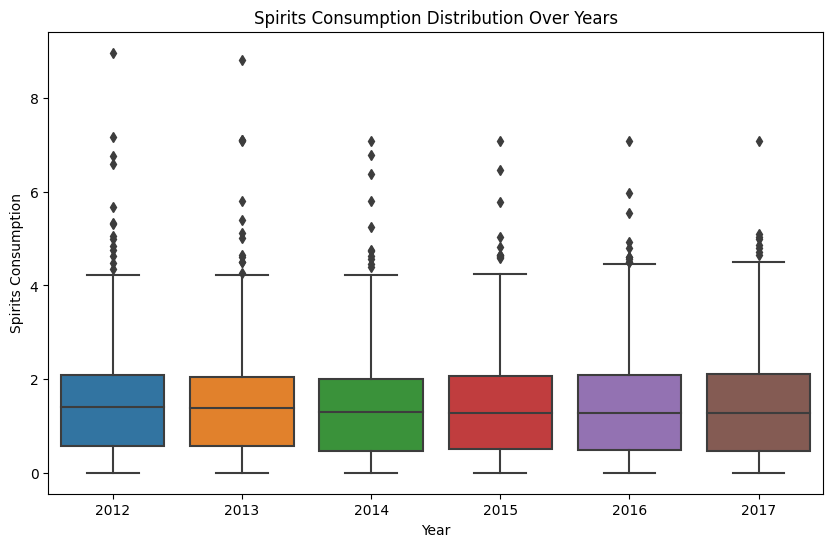

In [40]:
feature_boxplot("Spirits Consumption","Spirits Consumption Distribution Over Years")

Violin Plot of Spirits Consumption Distribution Over Years

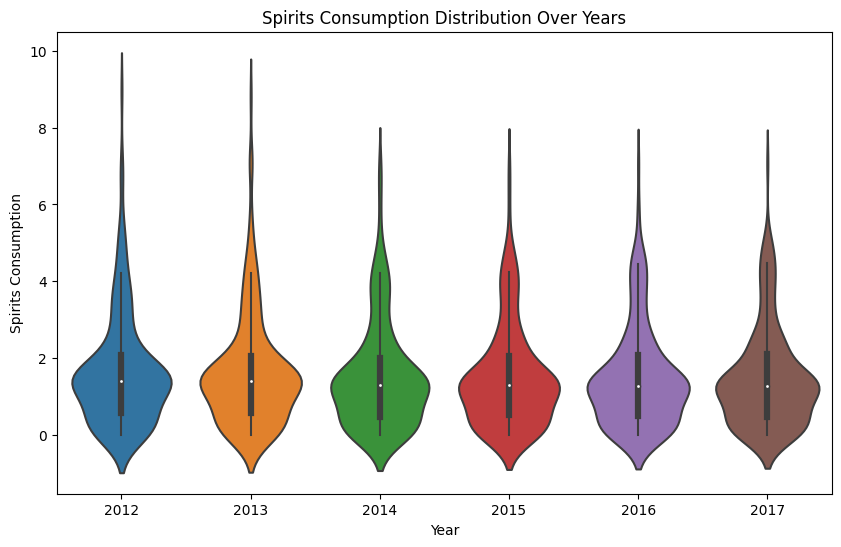

In [31]:
feature_violin_plt("Spirits Consumption","Spirits Consumption Distribution Over Years")

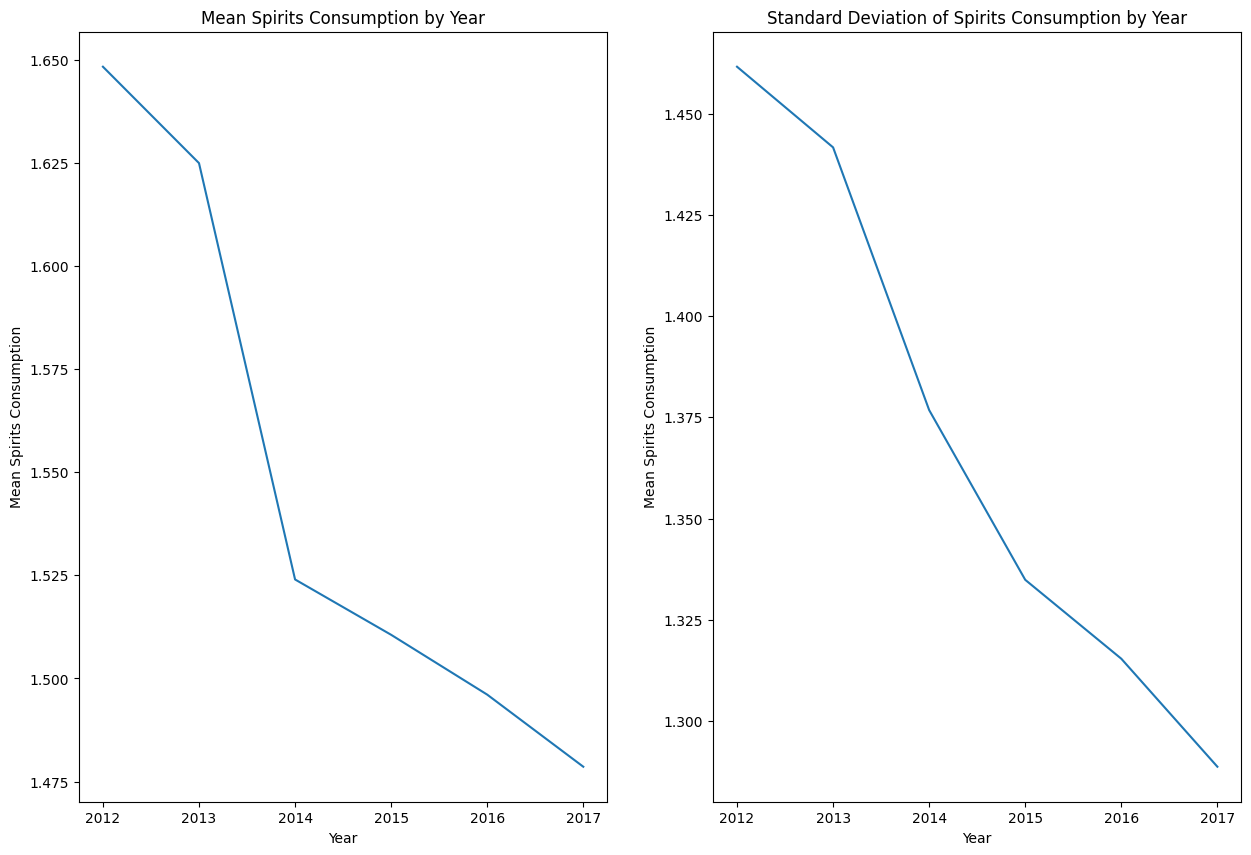

In [26]:
graph_feature_mean_std_vs_year('Spirits Consumption', 'Mean Spirits Consumption', 'Mean Spirits Consumption by Year', \
                 'Standard Deviation of Spirits Consumption by Year')

#Not sure about the labeling (can someone check it)

Box Plot of Smoking Death Percentage Over Years

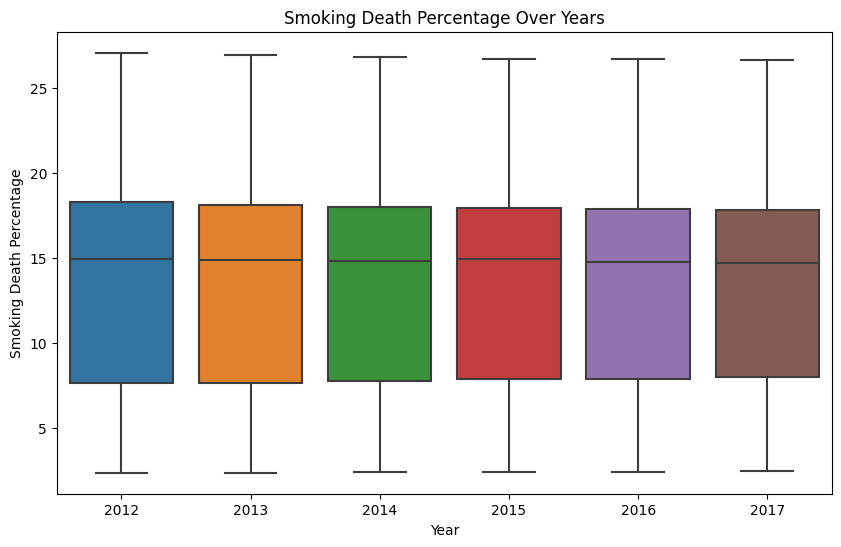

In [41]:
feature_boxplot("Smoking Death Percentage","Smoking Death Percentage Over Years")

Violin Plot of Smoking Death Percentage Over Years

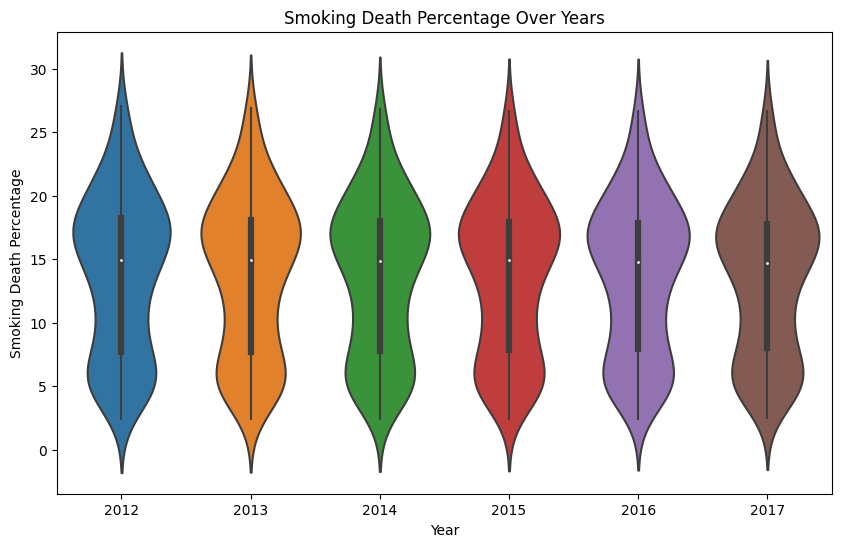

In [32]:
feature_violin_plt("Smoking Death Percentage","Smoking Death Percentage Over Years")

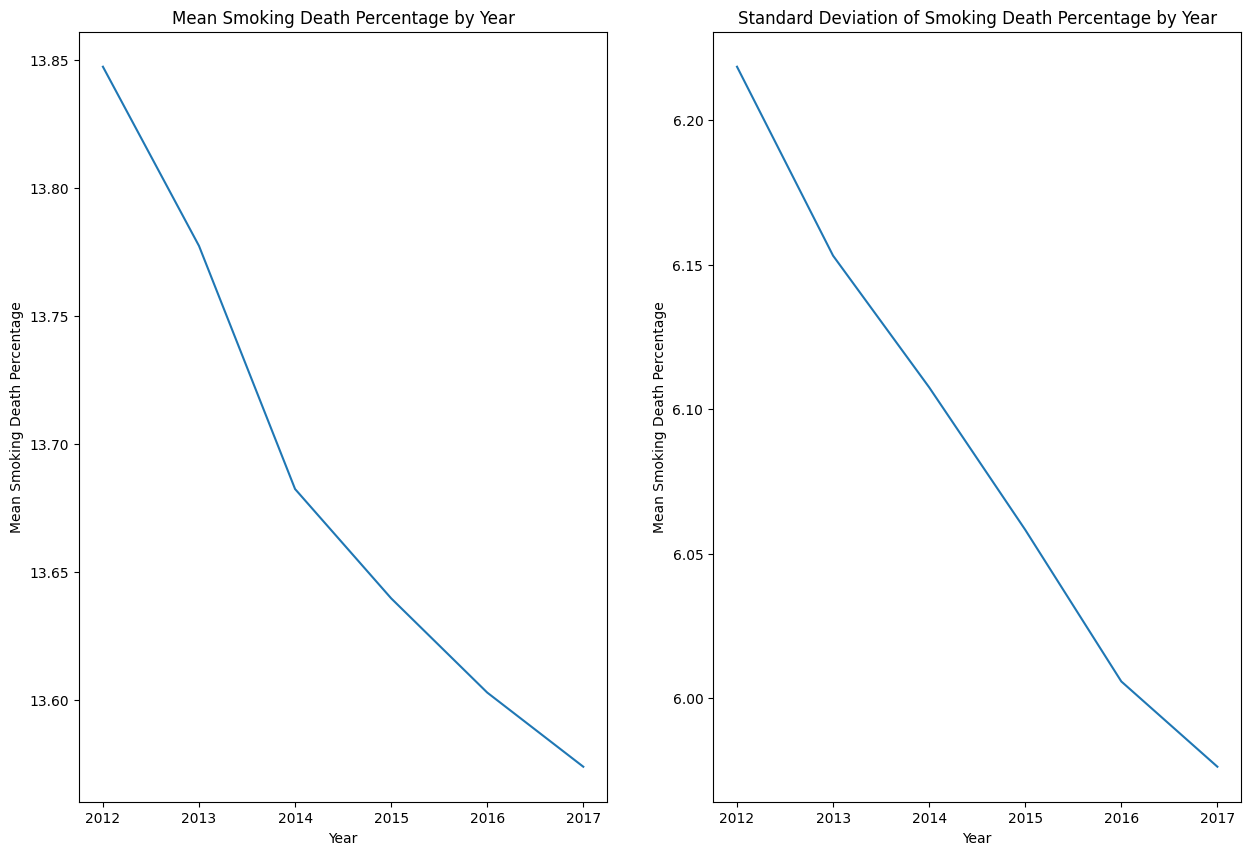

In [28]:
graph_feature_mean_std_vs_year('Smoking Death Percentage', 'Mean Smoking Death Percentage', 'Mean Smoking Death Percentage by Year', \
                 'Standard Deviation of Smoking Death Percentage by Year')

Box Plot of % of overweight adults Over Years

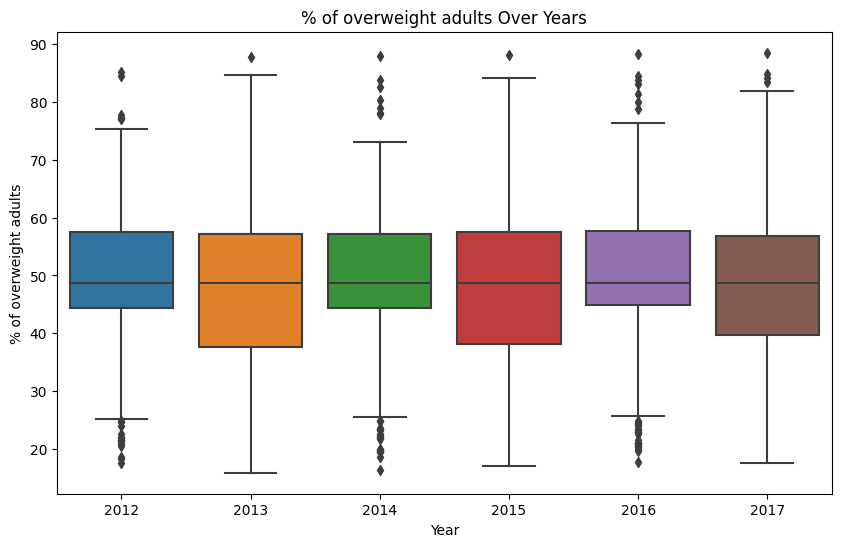

In [42]:
feature_boxplot("% of overweight adults","% of overweight adults Over Years")

Violin Plot of % of overweight adults Over Years

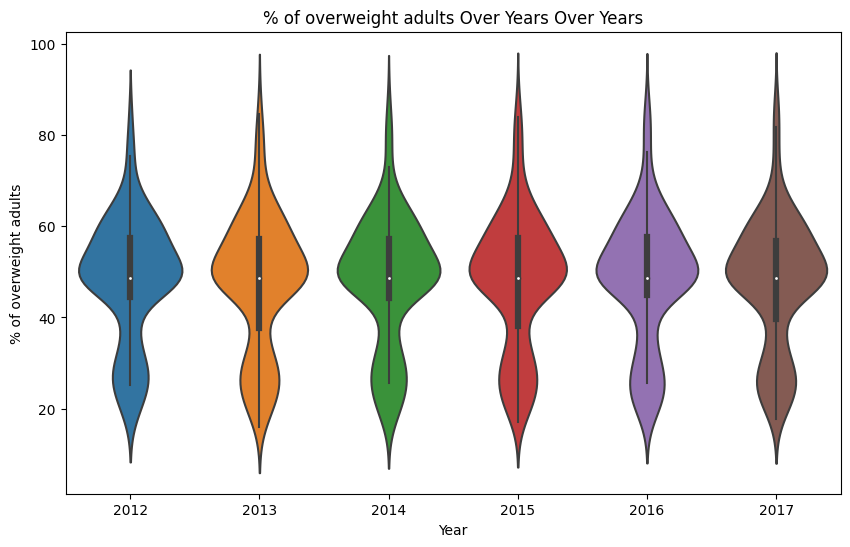

In [36]:
feature_violin_plt("% of overweight adults","% of overweight adults Over Years Over Years")

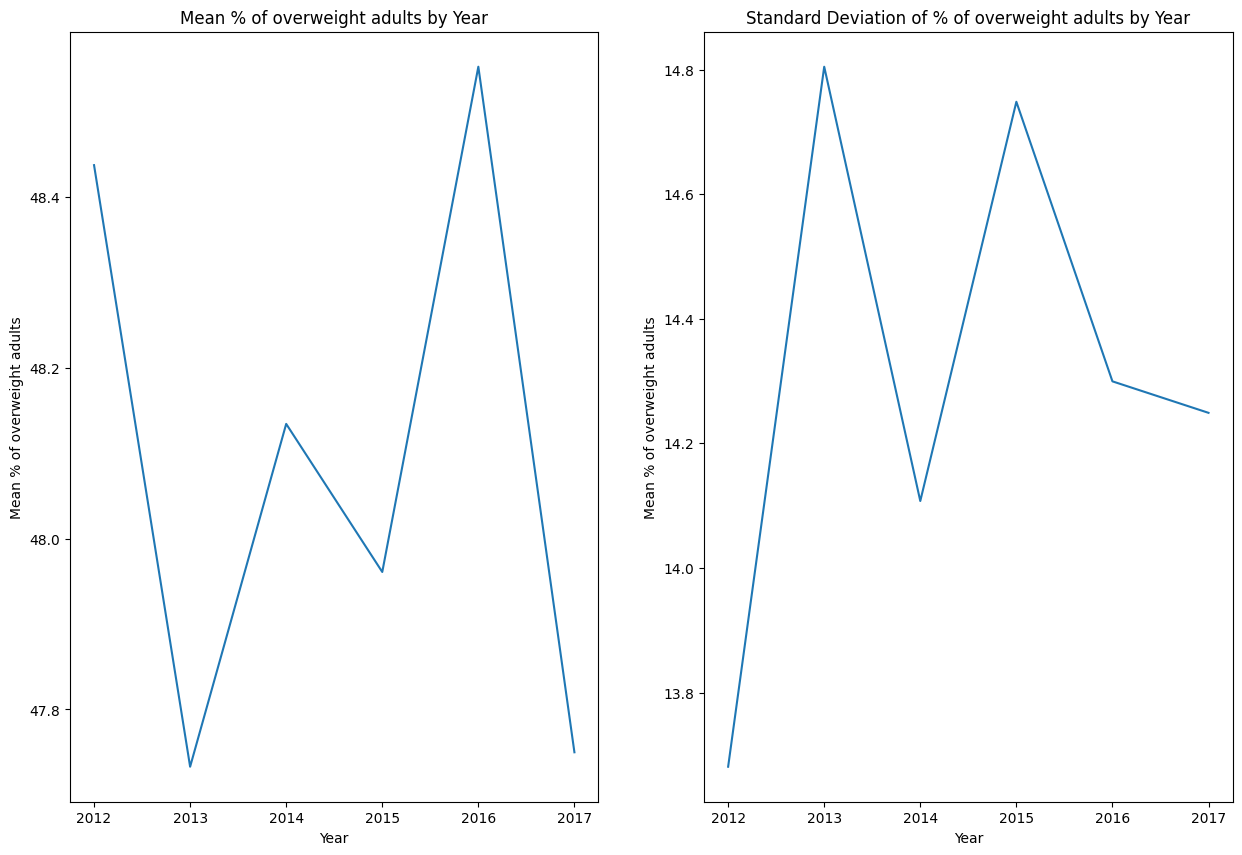

In [37]:
graph_feature_mean_std_vs_year('% of overweight adults', 'Mean % of overweight adults', 'Mean % of overweight adults by Year', \
                 'Standard Deviation of % of overweight adults by Year')